In [1]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


Test

In [2]:
from ipywidgets import interact

@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [3]:
from ipywidgets import IntSlider, interact
slider = IntSlider()

@interact
def print_value(x=slider):
    print(x)

Widget Javascript not detected.  It may not be installed or enabled properly.


Below still shows bug:

In [4]:
from ipywidgets import interact, Output#, Hbox
left = Output()
right = Output()
with left:
    @interact(x=(0,10))
    def f(x):
        @interact(y=(0,x))
        def g(y):
            with right:
                print('Product', x*y)

In [5]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Blackbody Radiation of a star and a planet

The radiation has a specific spectrum and intensity that depends only on the temperature of the body. The distribution of intensity versus wavelength is distributed following the Planck function. 

## Planck's Law
\begin{equation}
I(\nu,T) = \frac{2h\nu^3}{c^2}\frac{1}{e^{h\nu/kT}-1}
\end{equation}
where I is the specific intensity of radiation at the frequency $\nu$ and temperature $T$, with units [W m$^{-2}$ Hz $^{-1}$ sr$^{-1}$]. 

#see http://docs.astropy.org/en/stable/constants/
import astropy.units as u
from astropy.constants import c, h, k_B
#useful to convert
c.to('km/s') 

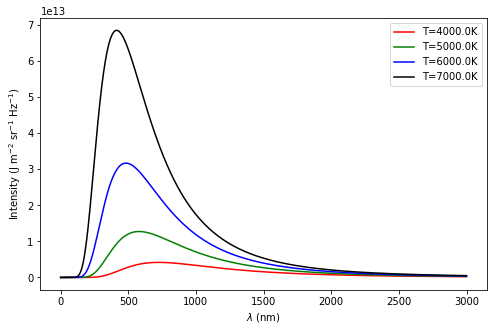

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

#remove raised error = overflow in numpy
np.seterr(all='ignore')
#to reset
#np.seterr(all='warn', over='raise')

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(lambda_, T):
    a = 2.0*h*c**2
    b = h*c/(lambda_*k*T)
    return a/ ((lambda_**5) * (np.exp(b) - 1.0))

# generate x-axis in increments from 1nm to 3 micrometer in 1 nm increments
# starting at 1 nm to avoid wav = 0, which would result in division by zero.
wavelengths = np.arange(1e-9, 3e-6, 1e-9) 

# intensity at T=4000K, 5000K, 6000K, 7000K
temperature = [4.0e3,5.0e3,6.0e3,7.0e3]
I = []
for i in temperature:
    ii = planck(wavelengths, i)
    I.append(ii)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))

colors = ['r-', 'g-', 'b-', 'k-']
counter = 0
for j,c in zip(I,colors):
    ax.plot(wavelengths*1e9, j, c, label='T={}K'.format(temperature[counter]))
    counter+=1

ax.set_ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
ax.set_xlabel('$\lambda$ (nm)')
plt.legend()
plt.show()

Make plotting interactive

In [7]:
from __future__ import print_function
from ipywidgets import interact, interactive
import ipywidgets as widgets

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def plotBB(T):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
    ax.set_xlim(0,3000)
    ax.set_ylim(0,7e13)
    ax.plot(wavelengths*1e9, planck(wavelengths, T))
    plt.show()
interact(plotBB, T=(5000,7000,100)); #T is temp from 5000-7000 K in 100K intervals

Widget Javascript not detected.  It may not be installed or enabled properly.


We can find the peak of the blackbody curves using Wien's displacement law.

In [8]:
def Wien(T):
    return 2.8977729e-3/T #m/K

lambda_max= []
for i in temperature:
    j = Wien(i)
    lambda_max.append(j)
    print('{:.2f} nm'.format(j*1e9))
#print('{}'.format(lambda_max*1e6))

724.44 nm
579.55 nm
482.96 nm
413.97 nm


In [9]:
import pandas as pd

d = pd.Series(wavelengths)
df = pd.DataFrame(wavelengths)
d1 = pd.Series(I[0])
d2 = pd.Series(I[1])
d3 = pd.Series(I[2])
d4 = pd.Series(I[3])

df['I1'] = pd.DataFrame(d1) 
df['I2'] = pd.DataFrame(d2)
df['I3'] = pd.DataFrame(d3)
df['I4'] = pd.DataFrame(d4)

df.columns = ['w','I1','I2','I3','I4']
df.tail()

w, I1, I2, I3, I4 = df.w, df.I1, df.I2, df.I3, df.I4

Let's determine the $\lambda_{max}$

In [10]:
I_max = np.array((max(I1), max(I2), max(I3), max(I4)), dtype=float)
wav_max =  np.array((w[I1.idxmax], w[I2.idxmax], w[I3.idxmax], w[I4.idxmax]), dtype=float)
w1 = pd.Series(I_max)
w2 = pd.Series(wav_max)
df2 = pd.DataFrame(w1)
df2['wav_max'] = pd.DataFrame(w2)
df2.columns = ['I_max','wav_max']
df2

,I_max,wav_max
0,4.175620e+12,7.250000e-07
1,1.274298e+13,5.800000e-07
2,3.170855e+13,4.840000e-07
3,6.853465e+13,4.140000e-07


#colors = ['r-', 'g-', 'b-', 'k-']
ax = plt.plot(df)
plt.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
plt.xlabel('$\lambda$ (nm)')
plt.legend([i for i in temperature])
#plt.legend(df.columns[1:])
plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k')
plt.show()

There's a problem with label colors. I will rather use the former plotting method.

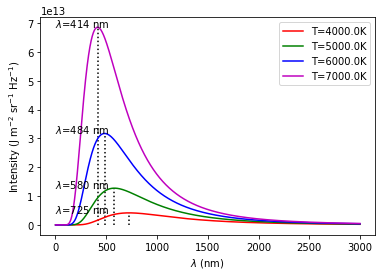

In [11]:
colors = ['r-', 'g-', 'b-', 'm-']
counter = 0
for j,c in zip(I,colors):
    plt.plot(wavelengths*1e9, j, c, label='T={}K'.format(temperature[counter]))
    counter+=1
    plt.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k', linestyles='dotted')
plt.xlabel('$\lambda$ (nm)')
for i,j in zip(wav_max, I_max):
    plt.text(i, j, r'$\lambda$={:.0f} nm'.format(i*1e9), fontsize=10)
plt.legend()
plt.show()

Make plotting interactive

In [12]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def Wien(T):
    return 2.8977729e-3/T #m/K

def plotBB(temp):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    ax.set_xlabel('$\lambda$ (nm)')
    ax.set_ylabel('Intensity (J . m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
    ax.set_xlim(0,3000)
    ax.set_ylim(0,8e13)
    ax.set_title('Blackbody curve of a star')
    ax.plot(wavelengths*1e9, planck(wavelengths, temp), label='T={}K'.format(temp))
    wav_peak=Wien(temp)
    I_peak=planck(Wien(temp), temp)
    ax.vlines(x=wav_peak*1e9, ymin=0, ymax=I_peak, color='k', linestyles='dotted')
    ax.text(wav_peak, I_peak, r'$\lambda$={:.0f} nm'.format(wav_peak*1e9), fontsize=10, horizontalalignment='left')
    
    plt.legend()
    plt.show()
interact(plotBB, temp=(5000,7000,100));

Widget Javascript not detected.  It may not be installed or enabled properly.


Theoretical models of disks undergoing the accretion of mass from an infalling cloud envelope predict disk temperatures in good agreement with these constraints: a moderately warm (500–1500 K) inner disk, surrounded by a cool (50–150 K) outer disk (Boss, 1998).

I_sum = [x + y for x, y in zip(I_disk[0], I_disk[1])]
len(I_sum)

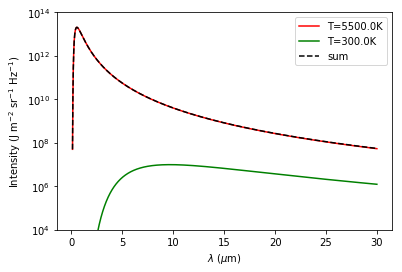

contrast=4.83e-07


In [13]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

temp_disk = [5.5e3, 2*1.5e2] #inner and outer disk in K
wavelengths = np.arange(0.1e-6, 30e-6, 1e-9)  #towards infrared region

I_disk=[]
for idx in temp_disk:
    I2 = planck(wavelengths, idx)
    I_disk.append(I2)

#Sum of 2 intensities
I_sum = I_disk[0]+I_disk[1]

colors = ['r-', 'g-', 'b-', 'm-']
counter = 0

#ax, fig = subplots(1,2,figsize=(15,4))
for j,c in zip(I_disk,colors):
    plt.plot(wavelengths*1e6, j, c, label='T={}K'.format(temp_disk[counter]))
    counter+=1

plt.plot(wavelengths*1e6, I_sum, 'k--', label='sum')
plt.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
#plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k', linestyles='dotted')
plt.xlabel('$\lambda$ ($\mu$m)')
#for i,j in zip(wav_max, I_max):
#    plt.text(i, j, r'$\lambda$={:.0f} nm'.format(i*1e9), fontsize=12)
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylim([1e4,1e14])
plt.show()

contrast = max(I_disk[1])/max(I_disk[0])
print('contrast={0:.2e}'.format(contrast))

The contribution of the disk to the total spectrum (black dotted lines) is very small such that the difference between the star and the sum spectra negligible. 

Now, we wish to reproduce the bump or excess in the infrared in Spectral Energy Distribution (SED) observed among YSOs.

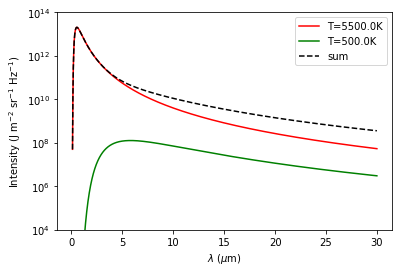

contrast=6.21e-06


In [14]:
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

temp_disk = [5.5e3, 5e2] #inner and outer disk in K
wavelengths = np.arange(0.1e-6, 30e-6, 1e-9)  #towards infrared region

I_disk=[]
for idx in temp_disk:
    I2 = planck(wavelengths, idx)
    I_disk.append(I2)

#offset the disk/planet's SED to produce bump redward of star's SED
offset=1e2

#Sum of 2 intensities
I_sum = I_disk[0]+I_disk[1]*offset

colors = ['r-', 'g-', 'b-', 'm-']
counter = 0

#ax, fig = subplots(1,2,figsize=(15,4))
for j,c in zip(I_disk,colors):
    plt.plot(wavelengths*1e6, j, c, label='T={}K'.format(temp_disk[counter]))
    counter+=1

plt.plot(wavelengths*1e6, I_sum, 'k--', label='sum')
plt.ylabel('Intensity (J m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
#plt.vlines(x=wav_max*1e9, ymin=0, ymax=I_max, color='k', linestyles='dotted')
plt.xlabel('$\lambda$ ($\mu$m)')
#for i,j in zip(wav_max, I_max):
#    plt.text(i, j, r'$\lambda$={:.0f} nm'.format(i*1e9), fontsize=12)
plt.yscale('log')
#plt.xscale('log')
plt.legend()
plt.ylim([1e4,1e14])
plt.show()

contrast = max(I_disk[1])/max(I_disk[0])
print('contrast={0:.2e}'.format(contrast))

In [15]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

wavelengths = np.arange(0.1e-6, 30e-6, 1e-9)  #towards infrared region

def Wien(T):
    return 2.8977729e-3/T #m/K

def plotBB(t_star, t_disk, disk_offset):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,5))
    ax.set_xlabel('$\lambda$ ($\mu$m)')
    ax.set_ylabel('Intensity (J . m$^{-2}$ sr$^{-1}$ Hz$^{-1}$)')
    ax.set_xlim(0,15)
    ax.set_ylim(1e7,1e14)
    ax.set_title('Blackbody curves of a star+disk')
    ax.plot(wavelengths*1e6, planck(wavelengths, t_star), 'b-', label='T$_s$={}K'.format(t_star))
    ax.plot(wavelengths*1e6, planck(wavelengths, t_disk), 'r-', label='T$_d$={}K'.format(t_disk))
    I_sum=planck(wavelengths, t_star)+planck(wavelengths, t_disk)*disk_offset
    ax.plot(wavelengths*1e6, I_sum, 'k--', label='sum')
    wav_peak_star=Wien(t_star)
    wav_peak_disk=Wien(t_disk)
    I_peak_star=planck(Wien(t_star), t_star)
    I_peak_disk=planck(Wien(t_disk), t_disk)
    ax.vlines(x=wav_peak_star*1e6, ymin=0, ymax=I_peak_star, color='k', linestyles='dotted')
    ax.vlines(x=wav_peak_disk*1e6, ymin=0, ymax=I_peak_disk, color='k', linestyles='dotted')
    ax.text(wav_peak_star, I_peak_star, r'$\lambda$={:.0f} nm'.format(wav_peak_star*1e9), fontsize=10)
    ax.text(wav_peak_disk, I_peak_disk, r'$\lambda$={:.0f} nm'.format(wav_peak_disk*1e9), fontsize=10)
    ax.set_yscale('log')
    plt.legend()
    plt.show()
interact(plotBB, t_star=(5000,7000,100), t_disk=(150,1500,50), disk_offset=(0,1000,100));

Widget Javascript not detected.  It may not be installed or enabled properly.


The temperature range T=150-1500 K corresponds to the higher limits of the inner and outer disk temperatures, respectively.

## YSO Classes

Low-mass protostars have been grouped into an evolutionary sequence (fig.1.2), Class 0 to Class III, on the basis of their spectral energy distributions (SEDs) (e.g., Lada et al. 1987; André et al. 1993). Class 0 represents the earliest evolutional stage of the star formation, while Class III is the most evolved to being on the main sequence. Lada et al. (1987) have performed quantitative classifications of Class 0 to Class III by defining the **spectral index** parameterized by α based on NIR and MIR emission:
$$
\alpha_{\lambda}= \frac{d\log(\lambda F_{\lambda})}{d\log(\lambda)}
$$
For class I sources 0 $\leq \alpha \lesssim$ 3, for class II sources of −2 $\lesssim \alpha \lesssim$ 0, for class III sources of −3 $\lesssim \alpha \lesssim$ −2.
Since class 0 sources are not detected at the NIR, the spectral index of $\alpha$ for the class 0 sources are not
defined. The characteristics of each class is as follows.

* Class 0 stage — the earliest stage of the star formation with SEDs that resemble black-bodies with T $\lesssim$ 30K (André et al. 1993). The luminosity during this early phase is supplied by gravity, which compresses the gas and dust in the molecular cloud into higher density. Since the majority of mass resides in the infalling envelope, these sources are so cool and their envelopes are also so thick that they are **not seen at NIR & MIR** (André et al. 1993). They are **only seen at the wavelengths longer than FIR**, i.e., sub-mm and/or mm continuum radiation (André et al. 1993). The age in this stage is $\sim$ 10$^4$ yr.

* Class I stage — the most luminous at **FIR** around 100 μm (Lada et al. 1987). Since powerful molecular outflows are associated with these objects, bipolar cavities excavated by outflows are seen at NIR wavelengths (e.g., Tamura et al. 1991). The age of the class I stage is $\sim$ 10$^5$ yr. 

* Class II stage — the most luminous at **NIR**. The SEDs show flat or decreasing trends at wavelengths longer than NIR (Lada et al. 1987), and thus, these objects show **infrared excesses** more than expected from a stellar photosphere. This signature is due to an **accretion disk** surrounding the central star. Another signature of these sources is to have a strong, broad, asymmetric Hα profile due to high velocities in a nearly free-falling flow (e.g., Hartmann et al. 1994). CO outflows are no longer present. Class II sources correspond to **classical T Tauri stars (CTTS)** and have an age of $\sim 10^6$ yr.

* Class III stage — corresponds to **weak-lined T Tauri stars**. Young stars with H$\alpha$ equivalent widths of $\gtrsim$ 10 Å are classified as classical T Tauri stars, while young stars with those of $\lesssim$ 10 Å are classified as weak-lined T Tauri stars. Since central stars are surrounded by thin disks, their SEDs approach those of a stellar photosphere. These sources are at the most evolved stage and the age is $\sim 10^7$ yr.

The specific intensity is derived by considering amount of energy $dE$ which is equal to the intensity of a ray of radiation at a frequency $nu$ passing through a surface area element $dA$ within a solid angle $d\omega$, at an angle $\theta$ from the normal of the surface, at time $dt$
$$
dE = I_{\nu} \cos\theta dA d\omega dt
$$
Total intensity $I$ is derived by integrating over all frequencies
$$
I = \int_0^{\infty} {I_{\nu}d\nu}. 
$$
The flux or flux density gives the power of the radiation per unit area:
$$
F_{\nu} = \frac{I_{\nu}}{4\pi r^2}
$$
with units [W m$^{-2}$ Hz $^{-1}$ or W m$^{-2}$].
Note that the luminosity is given by 
$$
L = 4\pi r^2 F
$$
(which is the total intensity?).
The surface brightness is defined as the flux density (and hence independent of distance from observer).

To compute the $spectral index, \alpha$, we need to compute $I_{\nu}$ (at specific $\nu$ or $\lambda$) and divide by the surface area $4\pi r^2$.